In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import warnings
import string
import re
from PIL import Image
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
from bs4 import BeautifulSoup
import nltk
import pandas as pd
import re
import string
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.lda_model
from tqdm import tqdm
warnings.filterwarnings("ignore")

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
%matplotlib inline

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [2]:
mask=np.array(Image.open("/kaggle/input/wordcloud-mask-collection/twitter.png"))

In [3]:
df1=pd.read_csv("/kaggle/input/english-fake-news-dataset/final_en.csv")

In [4]:
df1.head()

,title,text,lebel
0,Trump backs off praise of Russia's Putin after...,"HENDERSON, Nev. (Reuters) - U.S. Republican pr...",1
1,Trump's funding request for U.S. border wall h...,WASHINGTON (Reuters) - President Donald Trump’...,1
2,"As Votes For Trump Went Up, Canada’s Immigrat...","Well, sad to say, it s a sure chance the next ...",0
3,"U.S. Navy, shipbuilders ready for Trump's expa...","SIMI VALLEY, Calif. (Reuters) - The U.S. arms ...",1
4,"Trump defends DACA move, urges Congress to ena...",WASHINGTON (Reuters) - President Donald Trump ...,1


In [5]:
df1["Text"]=df1["title"]+" "+df1["text"]

In [6]:
df1.drop(columns=["title","text"],axis=1,inplace=True)

In [7]:
df1.shape

(10000, 2)

In [8]:
df1.isnull().sum()

lebel    0
Text     0
dtype: int64

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lebel   10000 non-null  int64 
 1   Text    10000 non-null  object
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [10]:
df1.head()

,lebel,Text
0,1,Trump backs off praise of Russia's Putin after...
1,1,Trump's funding request for U.S. border wall h...
2,0,"As Votes For Trump Went Up, Canada’s Immigrat..."
3,1,"U.S. Navy, shipbuilders ready for Trump's expa..."
4,1,"Trump defends DACA move, urges Congress to ena..."


In [11]:
df1["lebel"].value_counts()

lebel
1    5000
0    5000
Name: count, dtype: int64

In [12]:
df1.rename(columns={'lebel': 'label'}, inplace=True)

In [13]:
df2=pd.read_csv("/kaggle/input/fake-news-classification/WELFake_Dataset.csv")

In [14]:
df2.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [15]:
df2["Text"]=df2["title"]+" "+df2["text"]

In [16]:
df2.drop(columns=["title","text","Unnamed: 0"],axis=1,inplace=True)

In [17]:
df2.shape

(72134, 2)

In [18]:
df2.isnull().sum()

label      0
Text     597
dtype: int64

In [19]:
df2 = df2.dropna()


In [20]:
df2.isnull().sum()

label    0
Text     0
dtype: int64

In [21]:
df2.head()

,label,Text
0,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
2,1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,1,SATAN 2: Russia unvelis an image of its terrif...
5,1,About Time! Christian Group Sues Amazon and SP...


In [22]:
df2["label"].value_counts()

label
1    36509
0    35028
Name: count, dtype: int64

In [23]:
df = pd.concat([df1, df2], ignore_index=True)


In [24]:
df.head()

,label,Text
0,1,Trump backs off praise of Russia's Putin after...
1,1,Trump's funding request for U.S. border wall h...
2,0,"As Votes For Trump Went Up, Canada’s Immigrat..."
3,1,"U.S. Navy, shipbuilders ready for Trump's expa..."
4,1,"Trump defends DACA move, urges Congress to ena..."


In [25]:
real_df = df[df['label'] == 1].sample(n=5638, random_state=42)
fake_df = df[df['label'] == 0].sample(n=5638, random_state=42)
en_df = pd.concat([real_df, fake_df]).reset_index(drop=True)
en_df.head()

,label,Text
0,1,WOW! Huckabee Asks Nancy Pelosi If She’s “Raci...
1,1,WIKILEAKS: Why Is The Clinton “Scooby” Van Fit...
2,1,Thai government takes action against monk over...
3,1,‘Responsible Gun Owner’ Who Had Never Fired O...
4,1,Stark und schön zugleich Stark und schön zugle...


In [26]:
en_df.shape

(11276, 2)

In [27]:
en_df.isnull().sum()

label    0
Text     0
dtype: int64

In [28]:
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word, pos_tag):
    tag = pos_tag[0].upper()
    tag_dict = {'J': wordnet.ADJ, 'N': wordnet.NOUN, 'V': wordnet.VERB, 'R': wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def clean_text(text):
    text = text.lower()
    
    # Remove emails, hashtags, mentions, and URLs
    text = re.sub(r'\b[\w\.-]+@[\w\.-]+\.\w+\b', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove comments
    text = re.sub(r'//.*?$|/\*.*?\*/|#.*?$', '', text, flags=re.MULTILINE)
    
    # Remove all quotation marks (single and double, straight and curly)
    text = re.sub(r"[\"'“”‘’]", '', text)
    
    # Remove punctuation and numbers
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    
    # Tokenize, POS tag, lemmatize
    tokens = word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token, pos)) for token, pos in pos_tags]
    
    return ' '.join(lemmatized_tokens)

# Apply function
tqdm.pandas()
en_df['Text'] = en_df['Text'].progress_apply(clean_text)

100%|██████████| 11276/11276 [04:19<00:00, 43.39it/s]


In [29]:
en_df.head()

,label,Text
0,1,wow huckabee ask nancy pelosi if shes racist o...
1,1,wikileaks why be the clinton scooby van fit wi...
2,1,thai government take action against monk over ...
3,1,responsible gun owner who have never fire one ...
4,1,stark und schön zugleich stark und schön zugle...


In [30]:
from tqdm import tqdm
tqdm.pandas()

en_df['word_count'] = en_df['Text'].progress_apply(lambda x: len(word_tokenize(x)))
en_df['char_count'] = en_df['Text'].progress_apply(lambda x: len(x))
en_df['sentence_count'] = en_df['Text'].progress_apply(lambda x: len(sent_tokenize(x)))
en_df['unique_words'] = en_df['Text'].progress_apply(lambda x: len(set(word_tokenize(x.lower()))))
en_df['avg_word_length'] = en_df['Text'].progress_apply(lambda x: sum(len(word) for word in word_tokenize(x)) / len(word_tokenize(x)) if len(word_tokenize(x)) > 0 else 0)


100%|██████████| 11276/11276 [00:56<00:00, 198.15it/s]



=== 45 Most Common Words ===


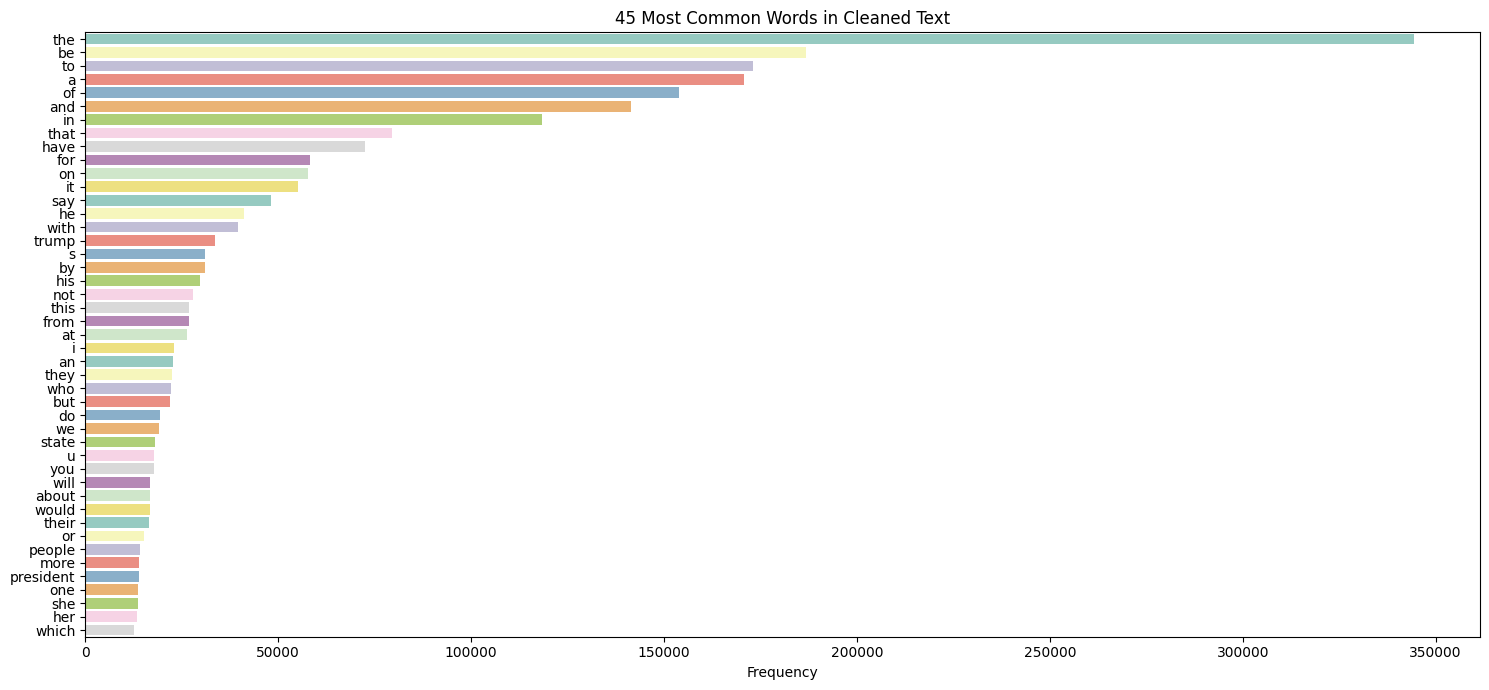

In [31]:
all_words = ' '.join(en_df['Text']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(45)

print("\n=== 45 Most Common Words ===")
word_freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
# Plot 45 most common words
plt.figure(figsize=(15, 7))
words, counts = zip(*common_words)
sns.barplot(x=list(counts), y=list(words),palette="Set3")
plt.title('45 Most Common Words in Cleaned Text')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

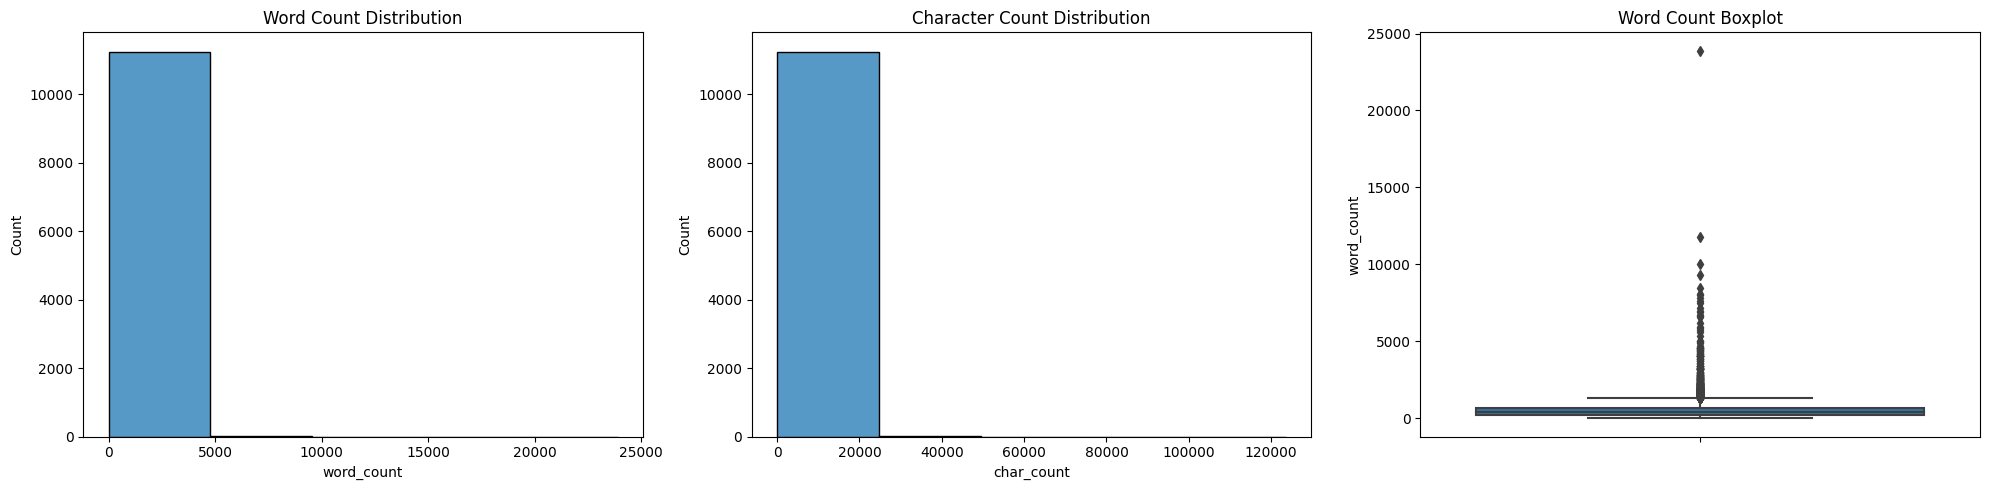

In [32]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.histplot(en_df['word_count'], bins=5)
plt.title('Word Count Distribution')
plt.subplot(1, 3, 2)
sns.histplot(en_df['char_count'], bins=5)
plt.title('Character Count Distribution')
plt.subplot(1, 3, 3)
sns.boxplot(y=en_df['word_count'])
plt.title('Word Count Boxplot')
plt.tight_layout()
plt.show()

In [33]:
en_df.head()

,label,Text,word_count,char_count,sentence_count,unique_words,avg_word_length
0,1,wow huckabee ask nancy pelosi if shes racist o...,257,1542,1,156,5.003891
1,1,wikileaks why be the clinton scooby van fit wi...,29,151,1,26,4.241379
2,1,thai government take action against monk over ...,306,1843,1,156,5.026144
3,1,responsible gun owner who have never fire one ...,813,4123,1,335,4.072571
4,1,stark und schön zugleich stark und schön zugle...,26,204,1,21,6.884615


100%|██████████| 11276/11276 [00:20<00:00, 561.35it/s]


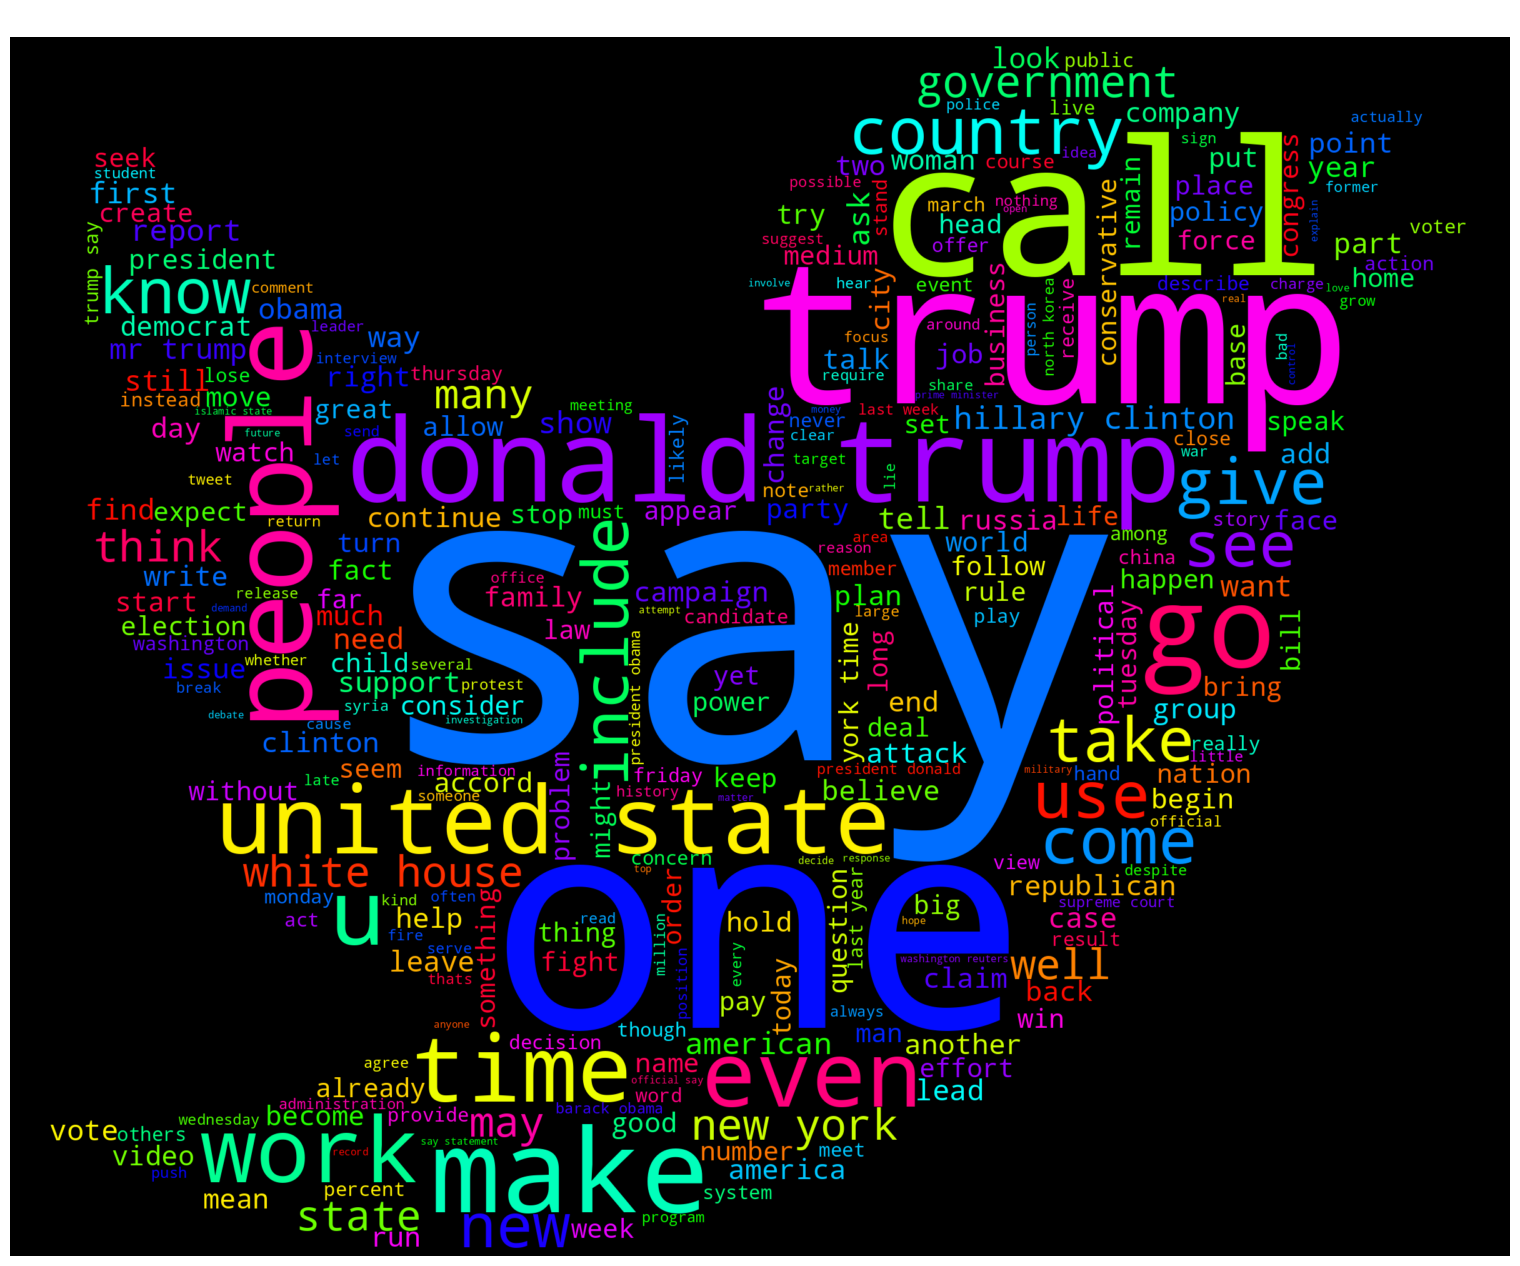

In [34]:
stop_words = set(stopwords.words('english'))

tqdm.pandas()

all_words = ' '.join(en_df['Text'].progress_apply(lambda x: ' '.join([word for word in word_tokenize(x.lower()) if word.isalpha() and word not in stop_words])))

wordcloud = WordCloud(width=800,height=800,background_color='black',colormap="hsv",max_words=300,mask=mask).generate(all_words)

plt.figure(figsize=(15, 15), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Custom WordCloud", fontsize=18, color='white')
plt.show()

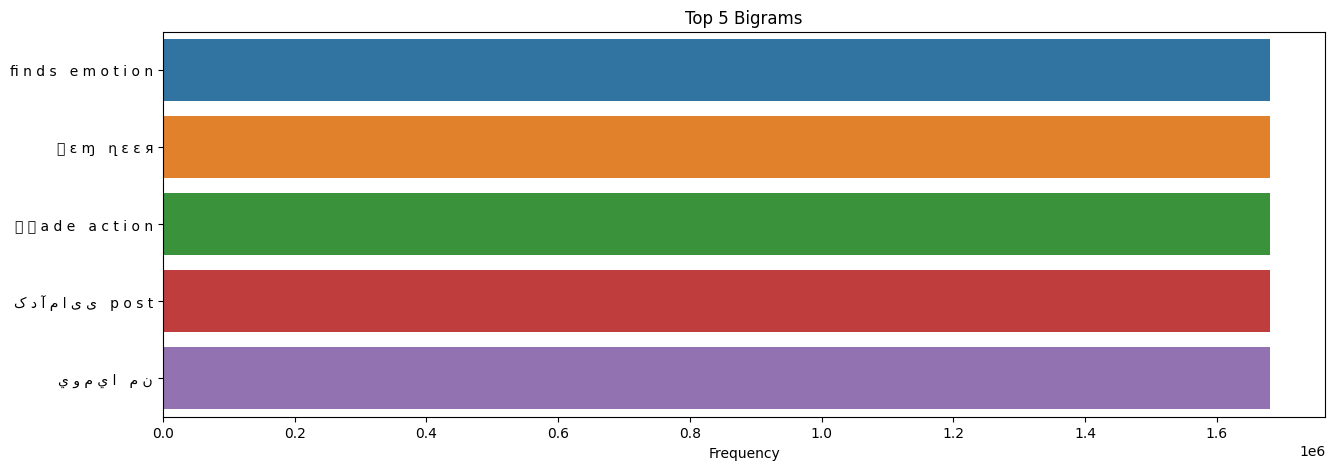

In [35]:
def get_ngrams(text, n):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngrams = vectorizer.fit_transform([text])
    ngram_counts = Counter(vectorizer.vocabulary_)
    return ngram_counts.most_common(5)

# Bigrams
bigrams = get_ngrams(' '.join(en_df['Text']), 2)
plt.figure(figsize=(15, 5))
ngrams, counts = zip(*bigrams)
sns.barplot(x=list(counts), y=[' '.join(ngram) for ngram in ngrams])
plt.title('Top 5 Bigrams')
plt.xlabel('Frequency')
plt.show()


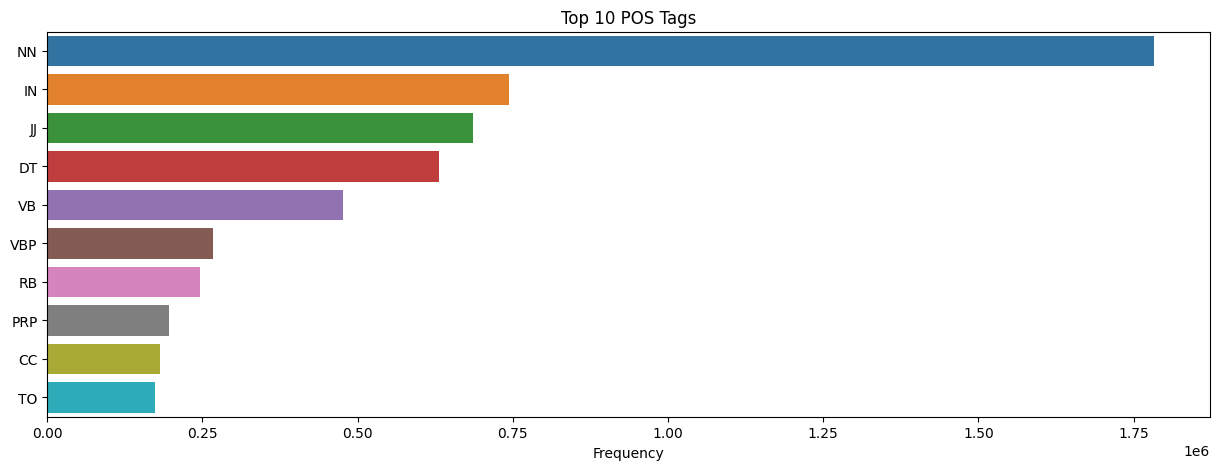

In [36]:
def get_pos_tags(text):
    tokens = word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    return [tag for word, tag in pos_tags]

pos_counts = Counter()
for text in en_df['Text']:
    pos_counts.update(get_pos_tags(text))

plt.figure(figsize=(15, 5))
tags, counts = zip(*pos_counts.most_common(10))
sns.barplot(x=list(counts), y=list(tags))
plt.title('Top 10 POS Tags')
plt.xlabel('Frequency')
plt.show()


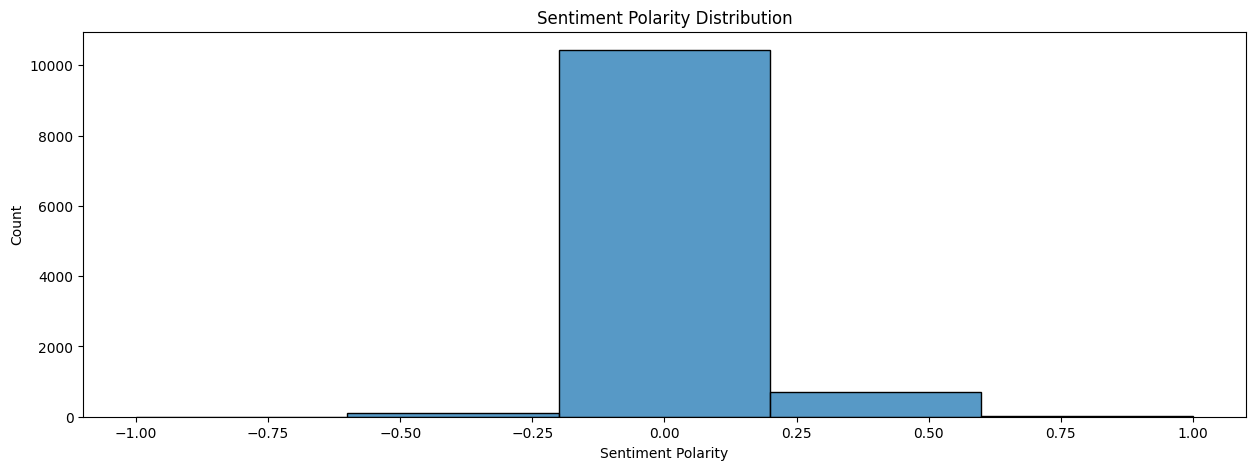

In [37]:
en_df['sentiment'] = en_df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(15, 5))
sns.histplot(en_df['sentiment'], bins=5)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.show()

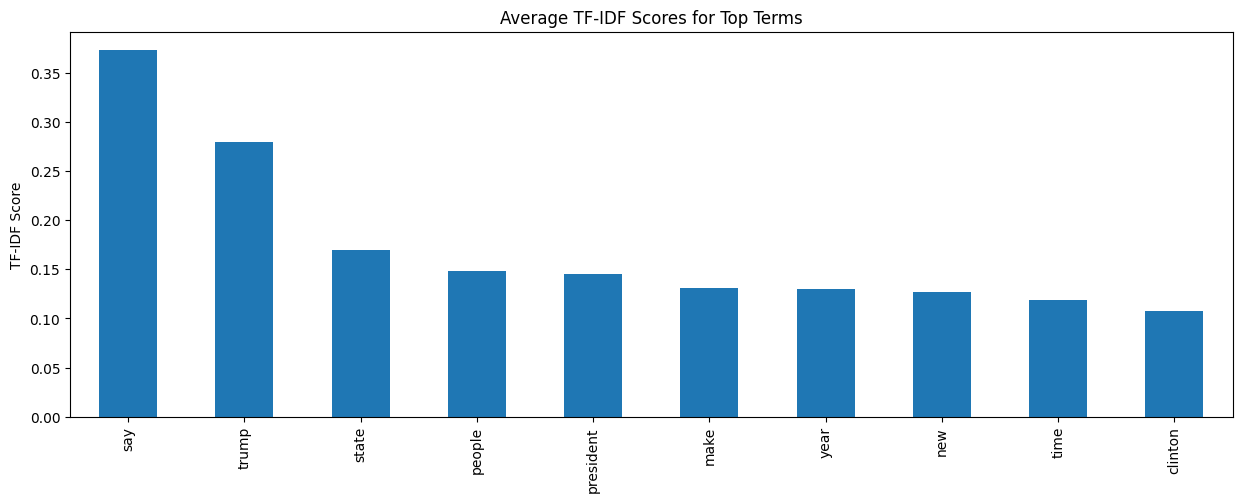

In [38]:
tfidf = TfidfVectorizer(stop_words='english', max_features=10)
tfidf_matrix = tfidf.fit_transform(en_df['Text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

plt.figure(figsize=(15, 5))
tfidf_df.mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average TF-IDF Scores for Top Terms')
plt.ylabel('TF-IDF Score')
plt.show()

In [39]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.lda_model

In [40]:
vectorizer = CountVectorizer(max_df=0.95, min_df=1, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(en_df['Text'])
lda = LatentDirichletAllocation(n_components=15, random_state=42, verbose=1)
lda.fit(doc_term_matrix)

# Display topics
def display_topics(model, feature_names, n_top_words=5):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

print("\n=== LDA Topics ===")
display_topics(lda, vectorizer.get_feature_names_out())

# Topic Visualization with pyLDAvis
pyLDAvis.enable_notebook()
lda_display = pyLDAvis.lda_model.prepare(lda, doc_term_matrix, vectorizer)
pyLDAvis.display(lda_display)  # Display inline in Jupyter

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10

=== LDA Topics ===

Topic 1:
food water world people use

Topic 2:
say mr new time year

Topic 3:
say climate company change energy

Topic 4:
say state united war military

Topic 5:
clinton say trump email campaign

Topic 6:
israel palestinian israeli jerusalem say

Topic 7:
say state year law million

Topic 8:
trump say people tax donald

Topic 9:
trump say republican vote state

Topic 10:
say mr party bank government

Topic 11:
trump people say just like

Topic 12:
game player mugabe nfl anthem

Topic 13:
police officer say black people

Topic 14:
jewish year jew church earth

Topic 15:
say north china korea state


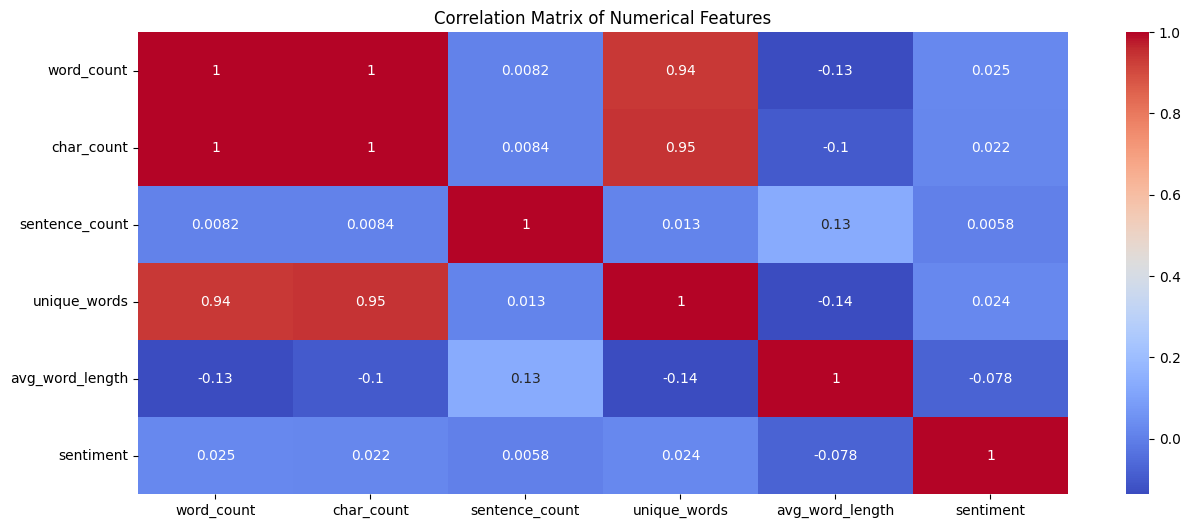

In [41]:
plt.figure(figsize=(15, 6))
sns.heatmap(en_df[['word_count', 'char_count', 'sentence_count', 'unique_words', 'avg_word_length', 'sentiment']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [42]:
en_df.head()

,label,Text,word_count,char_count,sentence_count,unique_words,avg_word_length,sentiment
0,1,wow huckabee ask nancy pelosi if shes racist o...,257,1542,1,156,5.003891,0.017814
1,1,wikileaks why be the clinton scooby van fit wi...,29,151,1,26,4.241379,0.312500
2,1,thai government take action against monk over ...,306,1843,1,156,5.026144,-0.022872
3,1,responsible gun owner who have never fire one ...,813,4123,1,335,4.072571,0.080293
4,1,stark und schön zugleich stark und schön zugle...,26,204,1,21,6.884615,-0.200000


In [43]:
en_df.drop(columns=["word_count","char_count","sentence_count","unique_words","avg_word_length","sentiment"],axis=1,inplace=True)

In [44]:
en_df.rename({"Text":"text"},inplace=True,axis=1)

In [45]:
en_df.head()

,label,text
0,1,wow huckabee ask nancy pelosi if shes racist o...
1,1,wikileaks why be the clinton scooby van fit wi...
2,1,thai government take action against monk over ...
3,1,responsible gun owner who have never fire one ...
4,1,stark und schön zugleich stark und schön zugle...


In [46]:
en_df.to_csv("enclean_fake_news.csv",index=False)